# Analyse frequency distribution of words

## Installation des dépendences

In [507]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Création d'une liste de stopwords

In [508]:
from nltk.corpus import stopwords

sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "messieurs","bourgmestres","bourgmestre","bruxelles","aprã","collã","francs","conseil","ville","frais","compte","total","communal","pense","annã","pense","echevin","section","intã","ãªtre","mãªme","honorable","travaux","leur","partie","place","lieu","plan","leurs","leur","ceux","toute","toutes","cret","tres"]
sw = set(sw)

In [509]:
print(f"{len(sw)} stopwords used: {sorted(sw)}")

228 stopwords used: ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'annã', 'aprã', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'bourgmestre', 'bourgmestres', 'bruxelles', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'ceux', 'collã', 'comme', 'communal', 'compte', 'conseil', 'contre', 'cret', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'echevin', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'frais', 'francs', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het',

## Visualiser les termes les plus fréquents

In [510]:
path = "../data/hopitaux/1970/Bxl_1970_Tome_RptAn_Part_4.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

In [511]:
# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

20840 words found


In [512]:
words[:50]

['b',
 ')',
 'Œuvres',
 'sociales',
 'Service',
 'social',
 '.',
 'En',
 '1969',
 '.',
 'le',
 'Service',
 'social',
 'a',
 'examiné',
 '4',
 '.',
 '199',
 'demandes',
 'd',
 "'",
 'aides',
 'diverses',
 '.',
 'Les',
 'assistantes',
 'sociales',
 'ont',
 'effectué',
 'des',
 'enquêtes',
 'et',
 'de',
 'nombreuses',
 'démarches',
 'auprès',
 'd',
 "'",
 'organismes',
 'officiels',
 'de',
 'bienfaisance',
 'et',
 'auprès',
 'd',
 "'",
 'œuvres',
 'privées',
 '.',
 'Depuis']

In [513]:
kept = [w.lower() for w in words if len(w) > 3 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

7450 words kept (3446 different word forms)


In [514]:
fdist = nltk.FreqDist(kept)
fdist.most_common(50)

[('voor', 93),
 ('brussel', 72),
 ('werden', 65),
 ('district', 64),
 ('werd', 41),
 ('door', 39),
 ('aantal', 39),
 ('stad', 37),
 ('totalen', 35),
 ('totaal', 30),
 ('frans', 29),
 ('worden', 28),
 ('andere', 28),
 ('personen', 27),
 ('dossiers', 25),
 ('opgesteld', 24),
 ('jaar', 23),
 ('heeft', 23),
 ('burgerlijke', 23),
 ('deze', 22),
 ('oktober', 21),
 ('frank', 21),
 ('mevr', 21),
 ('geboorten', 21),
 ('afvoeringen', 21),
 ('service', 20),
 ('over', 20),
 ('naar', 20),
 ('heer', 20),
 ('akten', 19),
 ('deel', 19),
 ('iste', 19),
 ('buitenland', 19),
 ('afdeling', 18),
 ('overlijdens', 18),
 ('stand', 17),
 ('belgique', 16),
 ('transports', 16),
 ('archief', 16),
 ('betrekking', 16),
 ('nederlands', 16),
 ('bevolkingsregisters', 16),
 ('société', 15),
 ('zijn', 15),
 ('rechtsbevolking', 15),
 ('geboren', 15),
 ('dienstplichtigen', 15),
 ('jean', 14),
 ('hebben', 14),
 ('heren', 14)]

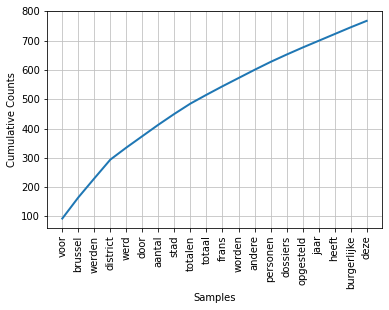

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [515]:
fdist.plot(20, cumulative=True)

In [516]:
# Impression des mots qui n'apparaissent qu'une fois dans le corpus
fdist.hapaxes()[:30]

['assistantes',
 'enquêtes',
 'démarches',
 'officiels',
 'bienfaisance',
 'permanence',
 'fonctionne',
 'semaine',
 'chaussée',
 'venir',
 'expropriées',
 'quartier',
 'examinés',
 'placements',
 'médicaux',
 'pharmaceutiques',
 'dépistage',
 'santé',
 'brugmann',
 'epargne',
 'encouragement',
 'épargne',
 'accordées',
 'prime',
 'octroyées',
 'dépense',
 'conformément',
 'arrêté',
 'accordé',
 'aveubles']

In [517]:
long_words = [w for w in voc if len(w) > 15]
sorted(long_words)[:30]

['adresopzoekingen',
 'aflossingstranches',
 'antwerpsesteenweg',
 'antwerpsesteenwegwijk',
 'antwerpsesteenwegwijken',
 'arbeidsongevallen',
 'begrafenissendienst',
 'benedenverdieping',
 'benedenverdiepingen',
 'beroepsveranderingen',
 'betalingsbevelen',
 'bevolkingsdienst',
 'bevolkingsregisters',
 'bezettingsbijdragen',
 'bezoldigingsregeling',
 'brutobezoldiging',
 'coeckelbergsteen',
 'compensatieweddeschaal',
 'compernolletourneur',
 'deiirvvaardersexploten',
 'deurwaardersexploten',
 'dienslplichtwetten',
 'dienstplichtigen',
 'dienstplichtwetten',
 'duivenliefhebbers',
 'eeuwfeestpaleizen',
 'expediîierechten',
 'faillietverklaringen',
 'geclassificeerde',
 'gecîassificeerde']